# Portfolio Weight Construction with Eigenvalue Decomposition

In [1]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.decomposition import PCA

%matplotlib inline
style.use('seaborn')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Reading in the price history and removing any tickers with N/A value

Using 2010 onwards for simplicity sake

In [2]:
df = pd.read_csv('DJI_Price.csv',index_col='Date',parse_dates=True)
df = df.loc[:,~df.isna().any()]
df = df['2000-01-01':]

In [3]:
df.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UNH,VZ,WMT,WBA,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,26.088079,34.042202,3.460857,25.741438,11.845388,17.167484,41.109673,11.907217,23.093716,21.139345,...,37.289700,1.815069,15.987980,28.391300,19.491549,5.671127,21.479733,45.753605,20.749420,11357.509766
2000-01-04,25.051456,32.756821,3.169071,25.701408,11.693136,17.167484,38.803371,11.920419,24.446487,20.734442,...,36.030037,1.716066,15.392351,27.844984,19.233133,5.598589,20.785389,44.041595,19.977560,10997.929688
2000-01-05,25.777090,32.040653,3.215448,27.302753,11.967190,17.475414,38.684490,12.026028,25.461063,21.864794,...,36.409924,1.815069,15.643135,27.315243,19.085476,5.585401,21.479733,43.142776,20.204578,11122.650391
2000-01-06,27.850321,32.693417,2.937188,27.582977,12.576205,18.219591,38.042519,12.039227,24.446487,22.995153,...,35.190277,1.805641,16.207415,28.573389,19.454630,5.789827,21.370630,43.613594,19.614326,11253.259766
2000-01-07,28.403187,33.169418,3.076317,28.383648,12.987292,18.540367,40.277527,12.831279,24.059982,22.927673,...,35.650139,1.805641,17.304638,30.857954,20.229856,6.469041,21.212824,46.909222,20.113766,11522.559570


In [4]:
# getting a dataframe of returns
data_raw = df.pct_change(1)
data_raw.dropna(axis=0,inplace=True)

In [5]:
data_raw.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UNH,VZ,WMT,WBA,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.039736,-0.037758,-0.084310,-0.001555,-0.012853,0.000000,-0.056101,0.001109,0.058577,-0.019154,...,-0.033780,-0.054545,-0.037255,-0.019242,-0.013258,-0.012791,-0.032326,-0.037418,-0.037199,-0.031660
2000-01-05,0.028966,-0.021863,0.014634,0.062306,0.023437,0.017937,-0.003064,0.008859,0.041502,0.054516,...,0.010544,0.057692,0.016293,-0.019025,-0.007677,-0.002356,0.033405,-0.020408,0.011364,0.011340
2000-01-06,0.080429,0.020373,-0.086539,0.010264,0.050890,0.042584,-0.016595,0.001098,-0.039848,0.051698,...,-0.033498,-0.005194,0.036072,0.046060,0.019342,0.036600,-0.005079,0.010913,-0.029214,0.011743
2000-01-07,0.019851,0.014560,0.047368,0.029028,0.032688,0.017606,0.058750,0.065789,-0.015810,-0.002935,...,0.013068,0.000000,0.067699,0.079954,0.039848,0.117312,-0.007384,0.075564,0.025463,0.023931
2000-01-10,-0.004866,0.013940,-0.017588,-0.014105,-0.032825,-0.026990,0.037190,-0.031893,0.152610,-0.013981,...,0.007291,0.016971,-0.001812,-0.004829,-0.018248,-0.017329,-0.005314,-0.018248,0.029345,0.004308


In [6]:
#normalizing the dataframe
norm_data = (data_raw - data_raw.mean()) / data_raw.std()

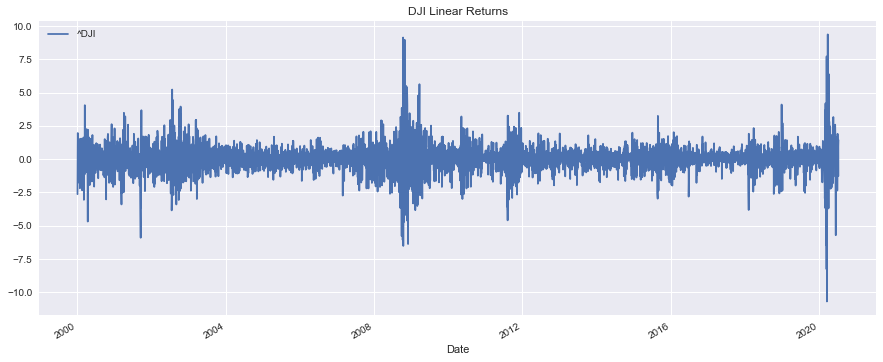

In [7]:
plt.figure(figsize=(15,6))
plt.title('DJI Linear Returns')
norm_data['^DJI'].plot()
plt.grid(True);
plt.legend()
plt.show()

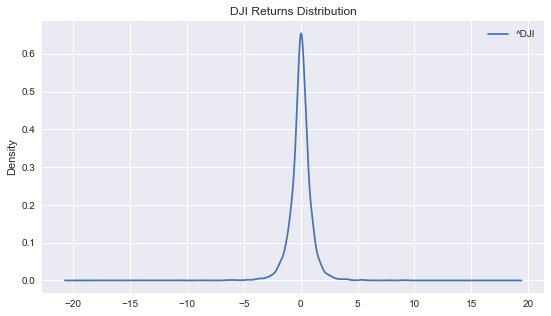

Mean: 0.00023303630475239026
Volatility: 0.01209906084315093


In [8]:
plt.figure(figsize=(9,5))
plt.title('DJI Returns Distribution')
norm_data['^DJI'].plot.kde()
plt.grid(True)
plt.legend()
plt.show()

print('Mean:',data_raw['^DJI'].mean())
print('Volatility:',data_raw['^DJI'].std())

In [9]:
percentage = int(len(norm_data)*0.8)
X_train = norm_data[:percentage]
X_test = norm_data[percentage:]

X_train_raw = data_raw[:percentage]
X_test_raw = data_raw[percentage:]

X_train.shape,X_test.shape,X_train_raw.shape,X_test_raw.shape

((4127, 28), (1032, 28), (4127, 28), (1032, 28))

In [10]:
cov_matrix = X_train.loc[:,X_train.columns != '^DJI'].cov()
pca = PCA().fit(cov_matrix)
pcs = pca.components_
len(pcs)

27

20 principal components explain 95.0% of variance.


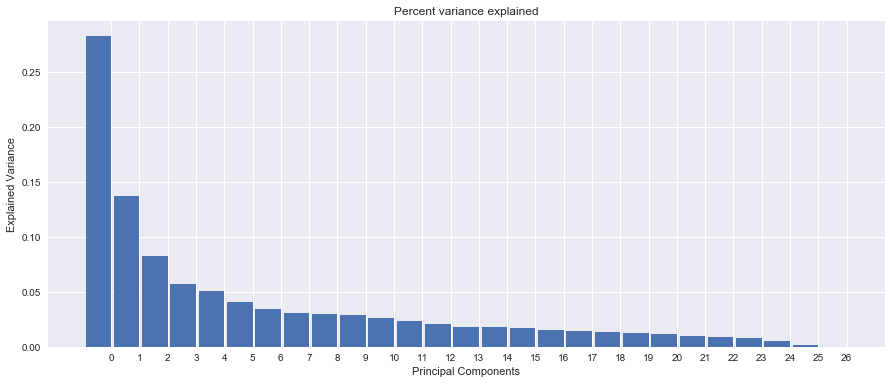

In [11]:
def plotPCA(plot=False):
    cov_matrix_raw = X_train_raw.loc[:,X_train_raw.columns != '^DJI'].cov()
    
    var_threshold = 0.95
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    #var_explained will sum up the explained var, and logical_not identifies the 
    #ones where it is less than threshold, where will cut to the index position
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1
    
    if plot:
        print('{} principal components explain {}% of variance.'.format(num_comp,100*var_threshold))
        
        bar_width = 0.9
        n_asset = len(pcs)
        x_index = np.arange(n_asset)
        fig,ax = plt.subplots(figsize=(15,6))
        
        rects = ax.bar(x_index,pca.explained_variance_ratio_[:n_asset],bar_width)
        
        ax.set_xticks(x_index + bar_width /2)
        ax.set_xticklabels(list(range(n_asset)),rotation=0)
        ax.set_title('Percent variance explained')
        ax.set_ylabel('Explained Variance')
        ax.set_xlabel('Principal Components')
        
        plt.show()
        
plotPCA(plot=True)

In [12]:
def sharpe_ratio(ts_returns,periods_per_year=252):
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return/annualized_vol
    
    return annualized_return,annualized_vol,annualized_sharpe

/Users/brandontan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


Eigen portfolio 18 with the highest Sharpe. 
Return 2.438064957560079
vol = 1.0251531224171133
Sharpe = 2.3782446780356015
----
      Return       Vol    Sharpe
18  2.438065  1.025153  2.378245
10  0.400944  0.866327  0.462810
1   0.400627  1.188715  0.337025
9   0.296382  0.885195  0.334821
11  0.348935  1.340640  0.260275
15  0.173620  0.703507  0.246792
4   0.089339  0.845565  0.105656
6   0.094946  0.993813  0.095537
8   0.061533  0.807461  0.076206
21 -0.013079  1.432770 -0.009129


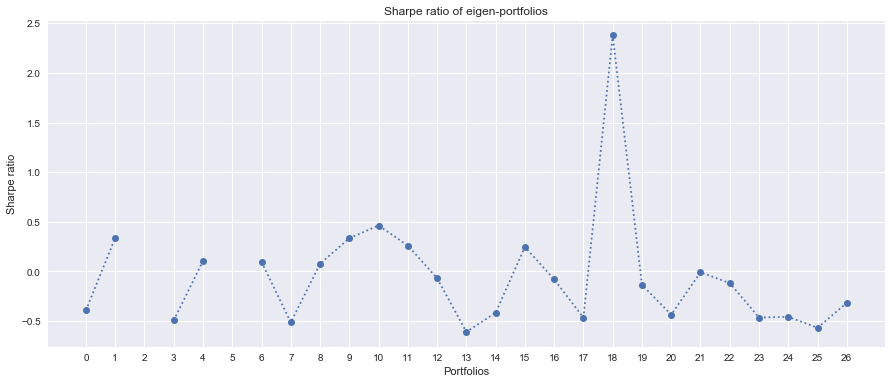

In [27]:
def optimizedPortfolio():
    
    n_portfolios = len(pcs)
    annualized_ret = np.array([0.]*n_portfolios)
    sharpe_metric = np.array([0.]*n_portfolios)
    annualized_vol = np.array([0.]*n_portfolios)
    highest_sharpe = 0
    
    for i in range(n_portfolios):
        pc_w = pcs[:,i]/sum(pcs[:,i]) #normalize to 1
        eigen_prtfi = pd.DataFrame(data={'weights':pc_w.squeeze()*100},index=X_test.columns[:-1])
        eigen_prti_returns = np.dot(X_test_raw.loc[:,eigen_prtfi.index],eigen_prtfi)/len(eigen_prtfi)
        
        er,vol,sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
    highest_sharpe = np.nanargmax(sharpe_metric)
    
    print('Eigen portfolio {} with the highest Sharpe. \nReturn {}\nvol = {}\nSharpe = {}'.format(highest_sharpe,
                                                                                                 annualized_ret[highest_sharpe],
                                                                                                annualized_vol[highest_sharpe],
                                                                                                sharpe_metric[highest_sharpe]))
    fig,ax = plt.subplots(figsize=(15,6))
    ax.plot(sharpe_metric,marker='o',linestyle=':')
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')
    ax.set_xticks(range(n_portfolios))
    
    results = pd.DataFrame(data={'Return':annualized_ret,'Vol':annualized_vol,'Sharpe':sharpe_metric})
    results.replace([np.inf,-np.inf],np.nan,inplace=True)
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'],ascending=False,inplace=True)
    print('----')
    print(results.head(10))
    plt.show()
    return highest_sharpe
    
best_pfto = optimizedPortfolio()

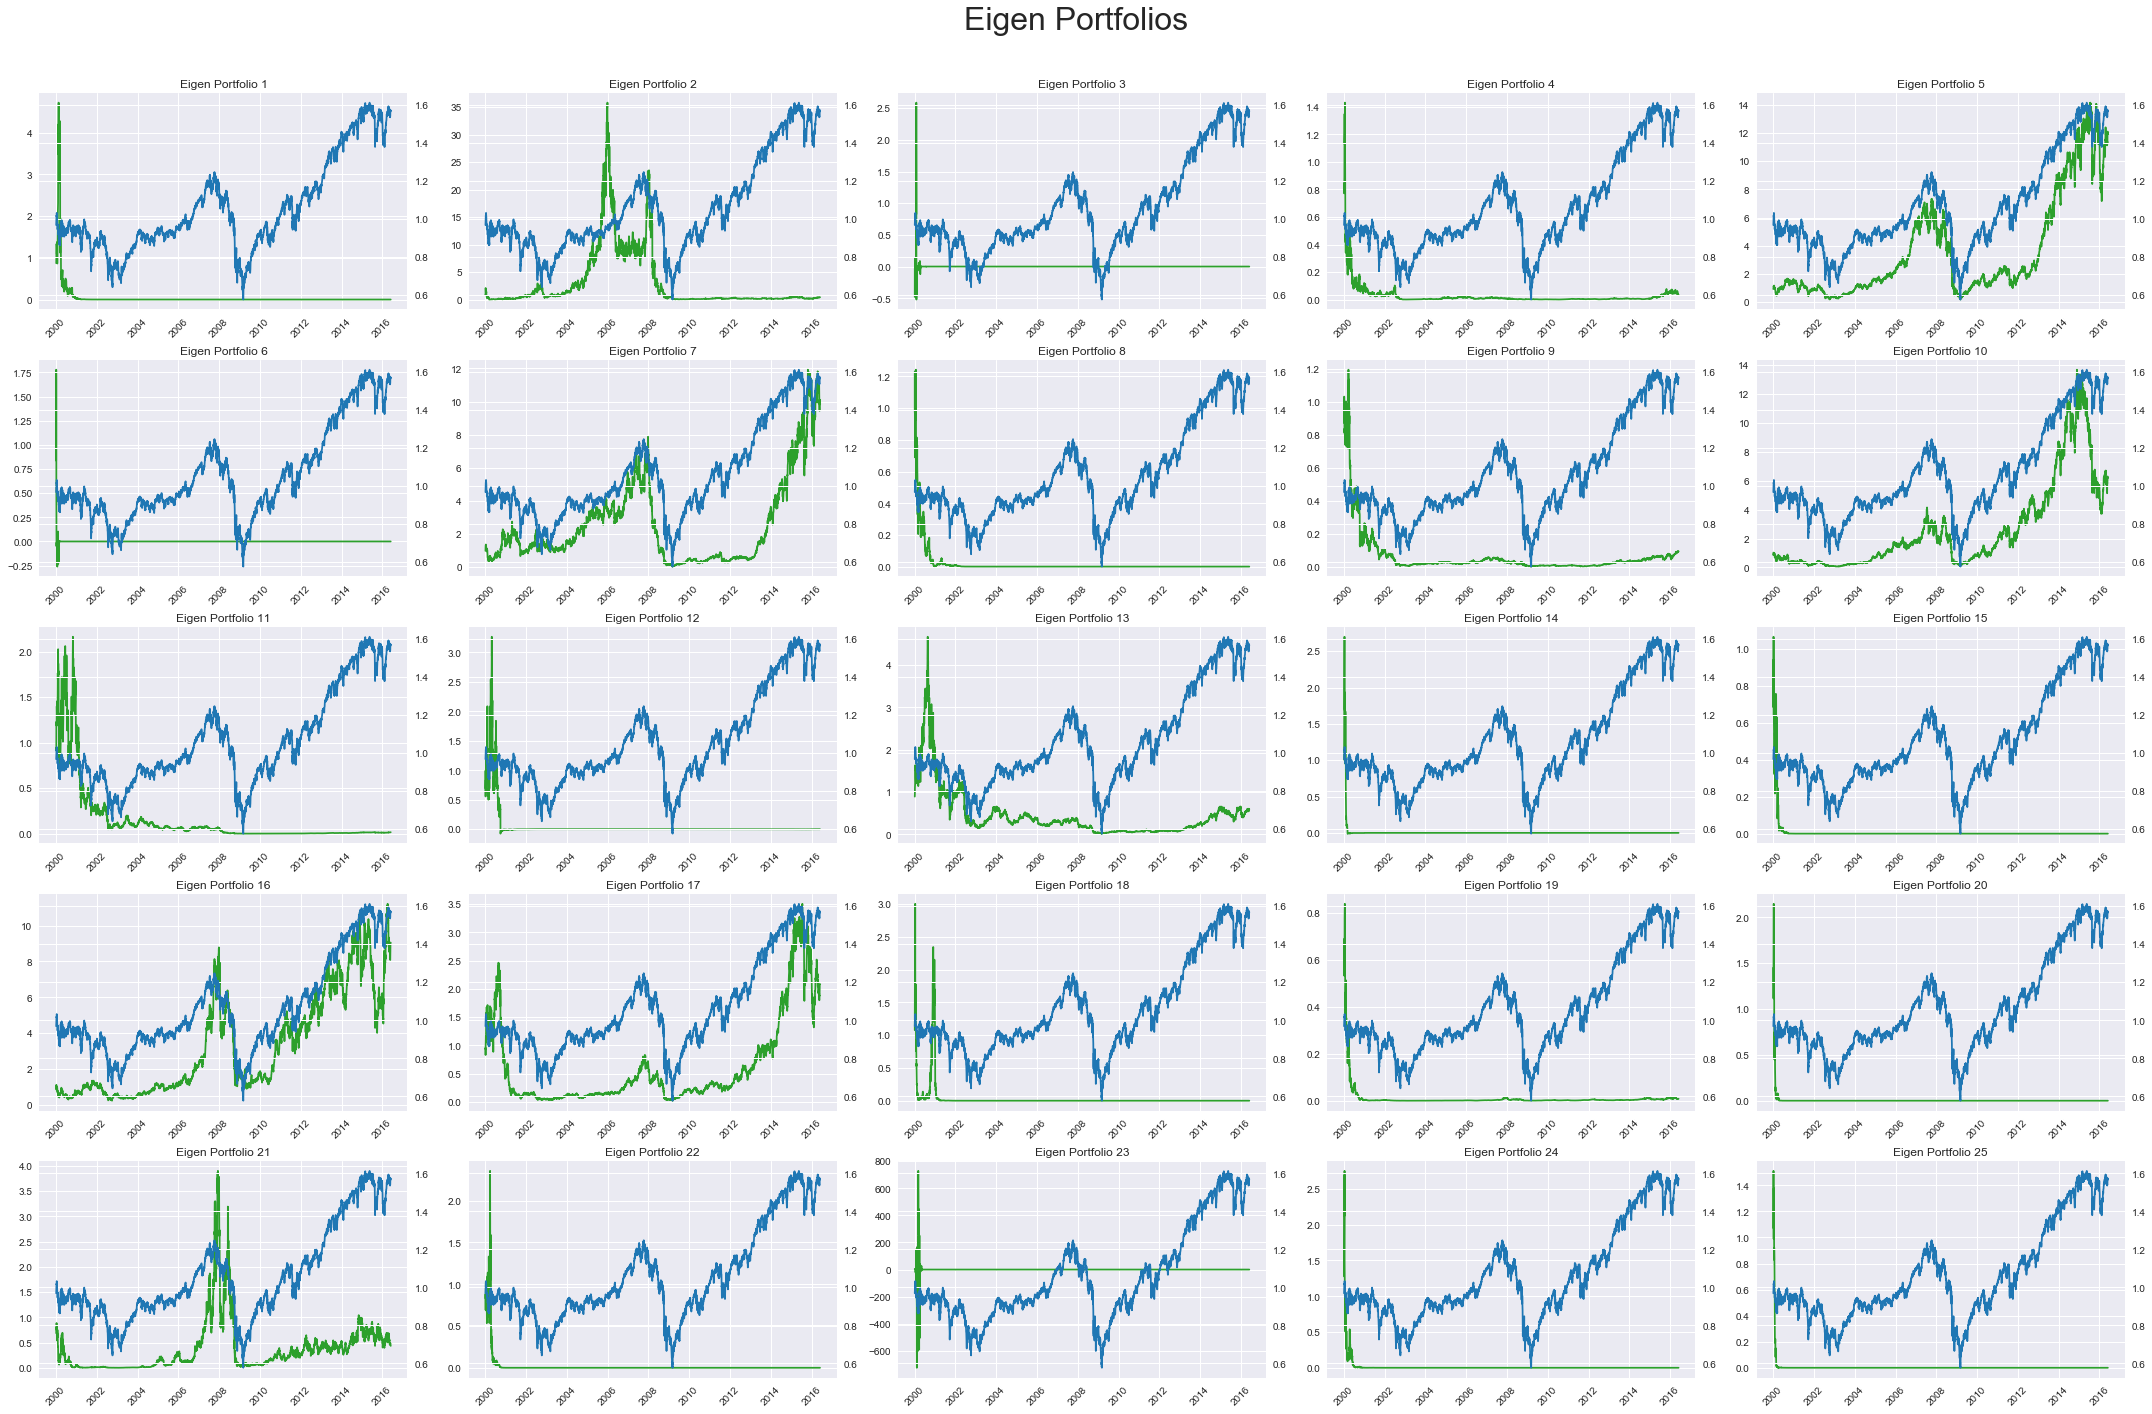

In [45]:
def visualisingPortfolios():
    #only view the first 9
    fig,ax = plt.subplots(nrows=5,ncols=5,figsize=(30,20))
    
    i = 0
    for row in ax:
        for col in row:
            pc_w = pcs[:,i]/sum(pcs[:,i])
            eigen_prtfi = pd.DataFrame(data={'weights':pc_w.squeeze()*100},index=X_train.columns[:-1])
            eigen_prti_returns = np.dot(X_train_raw.loc[:,eigen_prtfi.index],eigen_prtfi)/len(eigen_prtfi)
            eigen_prti_returns=pd.Series(eigen_prti_returns.squeeze(),index=X_train_raw.index)
            
            df_plot = pd.DataFrame({'PC':eigen_prti_returns,'^DJI':X_train_raw.loc[:,'^DJI']},
                           index=X_train.index)
            df_plot = np.cumprod(df_plot+1)
            t = col.twinx()
            col.plot(df_plot['PC'],color='tab:green')
            t.plot(df_plot['^DJI'],color='tab:blue')
            col.tick_params(axis='x', labelrotation=45)
            col.set_title('Eigen Portfolio {}'.format(i+1))
            i+=1
    fig.suptitle('Eigen Portfolios',fontsize=32)
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)
            
visualisingPortfolios()

Sum of weights of current eigen-portfolio: weights    100.0
dtype: float64


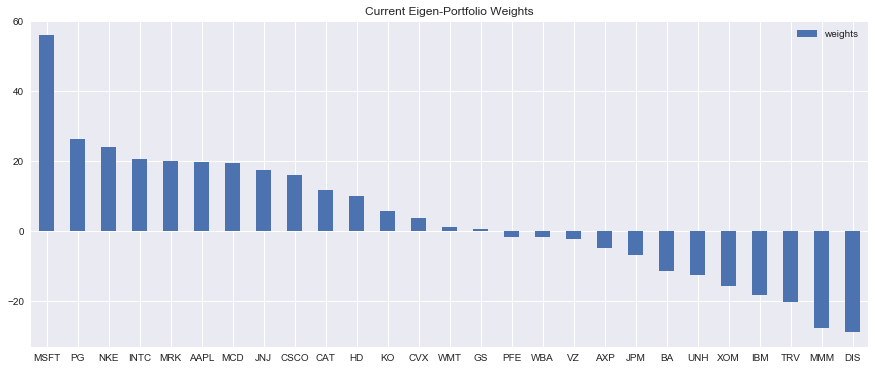

,weights
MSFT,55.831154
PG,26.161198
NKE,24.140419
INTC,20.458751
MRK,19.883739
AAPL,19.614923
MCD,19.540769
JNJ,17.548979
CSCO,15.999093
CAT,11.668522


In [41]:
def PCWeights():
    
    weights = pd.DataFrame()
    
    for i in range(len(pcs)):
        weights["weights_{}".format(i)] = pcs[:,i]/sum(pcs[:,i])
        
    weights = weights.values.T
    return weights

weights = PCWeights()
portfolio = pd.DataFrame()

def plotEigen(weights,plot=False,portfolio=portfolio):
    portfolio= pd.DataFrame(data={'weights':weights.squeeze()*100},index=X_train.columns[:-1])
    portfolio.sort_values(by=['weights'],ascending=False,inplace=True)
    
    if plot:
        print('Sum of weights of current eigen-portfolio: {}'.format(np.sum(portfolio)))
        
        portfolio.plot.bar(title='Current Eigen-Portfolio Weights',
                      figsize=(15,6),
                      rot=0)
        
        plt.show()
        
    return portfolio

plotEigen(weights=weights[best_pfto],plot=True)

Current Eigen-Portfolio:
Return = 243.806495756008
Vol = 102.56501663844591
Sharpe = 2.3770921484413674
----
DJI:
Return = 9.599617775851254
Vol = 20.976454502459347
Sharpe = 0.45763776594017663


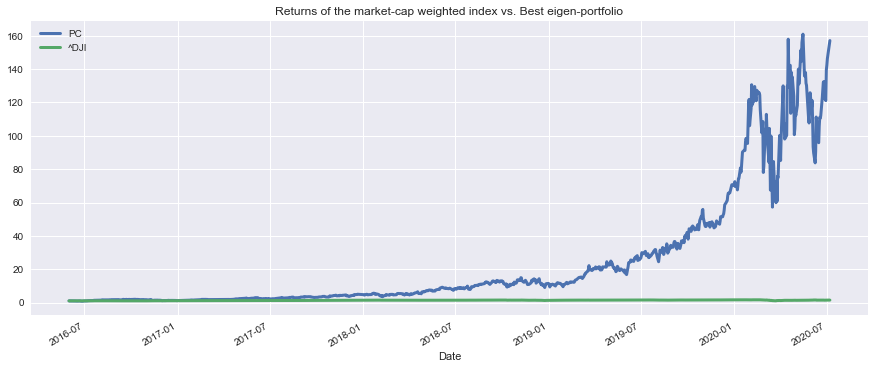

In [42]:
def plotSharpe(eigen):
    
    eigen_portfolio_returns = np.dot(X_test_raw.loc[:,eigen.index],eigen)/len(eigen)
    eigen_portfolio_returns = pd.Series(eigen_portfolio_returns.squeeze(),index=X_test_raw.index)
    
    returns,vol,sharpe = sharpe_ratio(eigen_portfolio_returns)
    sp500_returns,sp500_vol,sp500_sharpe=sharpe_ratio(X_test_raw.loc[:,'^DJI'])
    print('Current Eigen-Portfolio:\nReturn = {}\nVol = {}\nSharpe = {}'.format(returns*100,
                                                                               vol*100,
                                                                               sharpe))
    print('----')
    print('DJI:\nReturn = {}\nVol = {}\nSharpe = {}'.format(sp500_returns*100,
                                                               sp500_vol*100,
                                                               sp500_sharpe))
    
    year_frac = (eigen_portfolio_returns.index[-1] - eigen_portfolio_returns.index[0]).days / 252
    df_plot = pd.DataFrame({'PC':eigen_portfolio_returns,'^DJI':X_test_raw.loc[:,'^DJI']},
                           index=X_test.index)
    
    np.cumprod(df_plot+1).plot(figsize=(15,6),linewidth=3)
    plt.title('Returns of the market-cap weighted index vs. Best eigen-portfolio')
    plt.show()
    
plotSharpe(eigen=plotEigen(weights=weights[best_pfto]))